In [1]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [24]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

import numpy as np
import matplotlib.pyplot as plt
# using inline backend instead of notebook
%matplotlib inline
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from IPython.display import HTML

In [3]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

In [6]:
plt.scatter(X,y)

In [7]:
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [8]:
import time

b = 150
m = -127.82
all_b = []
all_m = []
all_cost = []
all_lr = []


epochs = 1

start = time.time()

t0,t1 = 5,50
def learning_rate(t):
    return t0/(t + t1)

for i in range(epochs):
    for j in range(X.shape[0]):

        lr = learning_rate(i * X.shape[0] + j)

        idx = np.random.randint(X.shape[0], size=1)

        slope_b = -2 * (y[idx] - (m * X[idx]) -  b)
        slope_m = -2 * (y[idx] - (m * X[idx]) -  b) * X[idx]
        cost = (y[idx] - m * X[idx] -b) ** 2


        b = b - (lr * slope_b)
        m = m - (lr * slope_m)
        all_b.append(b)
        all_m.append(m)
        all_cost.append(cost)
        all_lr.append(lr)
print("Total time taken",time.time() - start)

Total time taken 0.009378433227539062


In [10]:
len(all_cost)

100

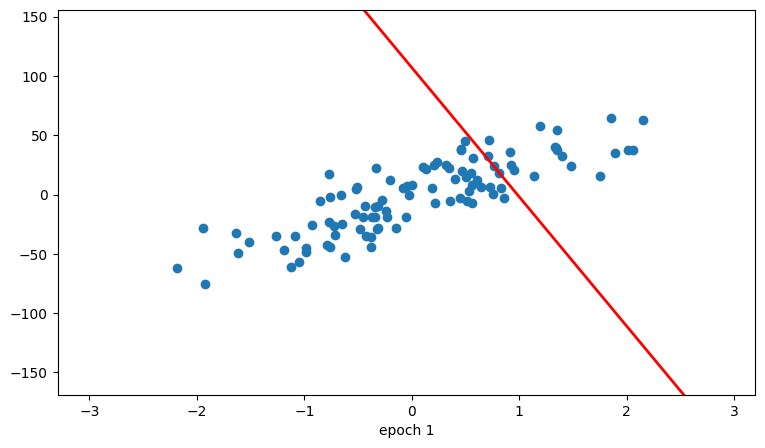

In [25]:
fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*(-27) -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*all_m[i] + all_b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, frames=100, interval=5)

f = r"stochastic_animation_line_plot.gif"
writergif = animation.PillowWriter(fps=2)
anim.save(f, writer=writergif)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

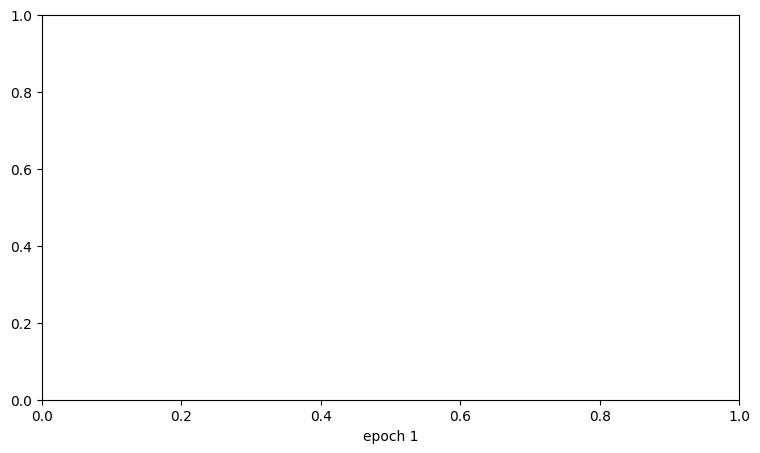

In [23]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

import numpy as np
import matplotlib.pyplot as plt
# using inline backend instead of notebook
%matplotlib inline
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from IPython.display import HTML

# ... (rest of the code for data generation, model fitting, etc.) ...

fig, ax = plt.subplots(figsize=(9, 5))

# ... (rest of the code for setting up the plot) ...

anim = FuncAnimation(fig, update, frames=100, interval=5, blit=False)

# Embed animation in notebook using HTML
HTML(anim.to_html5_video())

In [13]:

m_arr = np.linspace(-150, 150, 10)
b_arr = np.linspace(-150, 150, 10)
mGrid, bGrid = np.meshgrid(m_arr,b_arr)

final = np.vstack((mGrid.ravel().reshape(1,100),bGrid.ravel().reshape(1,100))).T

z_arr = []

for i in range(final.shape[0]):
    z_arr.append(np.sum((y - final[i,0]*X.reshape(100) - final[i,1])**2))

z_arr = np.array(z_arr).reshape(10,10)

In [27]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

# intercept graph
num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9,5))
axis = plt.axes(xlim =(-150, 150), ylim =(-150, 150))

axis.contourf(m_arr, b_arr, z_arr)

line, = axis.plot([], [], lw = 2,color='white')

xdata, ydata = [], []

# animation function
def animate(i):
    label = 'epoch {0}'.format(i + 1)
    xdata.append(all_m[i])
    ydata.append(all_b[i])
    line.set_data(xdata, ydata)
    axis.set_xlabel(label)

    return line,

# calling the animation function
anim = animation.FuncAnimation(fig, animate, frames = 100,repeat=False, interval = 100)

#f = r"stochastic_animation_contour_plot.gif"
#writergif = animation.PillowWriter(fps=2)
#anim.save(f, writer=writergif)


<IPython.core.display.Javascript object>

/usr/local/lib/python3.11/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

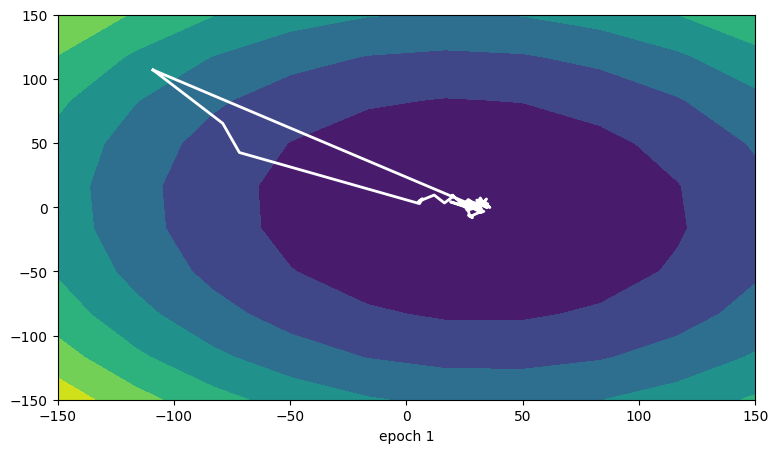

In [29]:
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Assuming m_arr, b_arr, z_arr, all_m, all_b are already defined

# using inline backend instead of notebook
%matplotlib inline

fig, ax = plt.subplots(figsize=(9, 5))

ax.contourf(m_arr, b_arr, z_arr)
line, = ax.plot([], [], lw=2, color='white')
xdata, ydata = [], []

def animate(i):
    label = 'epoch {0}'.format(i + 1)
    xdata.append(all_m[i])
    ydata.append(all_b[i])
    line.set_data(xdata, ydata)
    ax.set_xlabel(label)
    return line,

# Create the animation
anim = animation.FuncAnimation(fig, animate, frames=100, repeat=False, interval=100, blit=False)

# Embed animation in notebook using HTML
HTML(anim.to_html5_video())

In [16]:
all_b[-1]

array([[1.47483502]])

In [28]:
all_m[-1]

array([[28.62178806]])

In [18]:
num_epochs = list(range(0,100))
fig = plt.figure(figsize=(9,5))
axis = plt.axes(xlim =(0, 31), ylim =(0, 175000))

line, = axis.plot([], [], lw = 2)

xdata, ydata = [], []

# animation function
def animate(i):
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i])
    ydata.append(all_cost[i])
    line.set_data(xdata, ydata)
    axis.set_xlabel(label)

    return line,

# calling the animation function
anim = animation.FuncAnimation(fig, animate, frames = 100,repeat=False, interval = 150)

f = r"stochastic_animation_cost_plot.gif"
writergif = animation.PillowWriter(fps=2)
anim.save(f, writer=writergif)

<IPython.core.display.Javascript object>

/usr/local/lib/python3.11/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


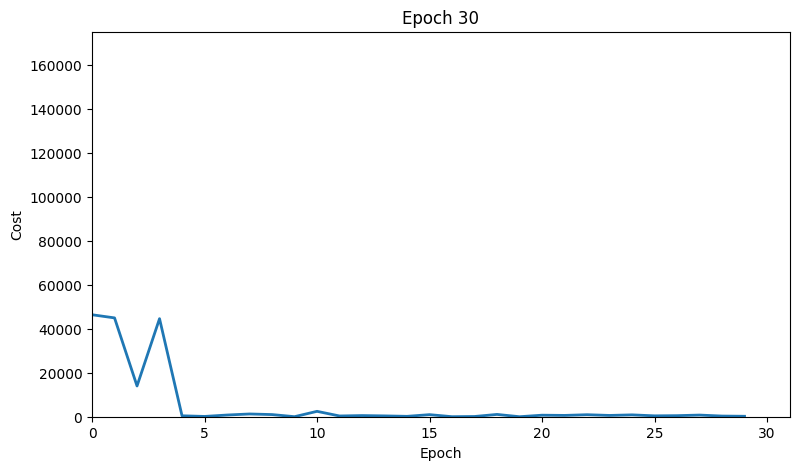

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Assuming num_epochs and all_cost are already defined

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.set_xlim(0, 31)
ax.set_ylim(0, 175000)  # Adjust ylim based on your data
ax.set_xlabel('Epoch')
ax.set_ylabel('Cost')
line, = ax.plot([], [], lw=2)

xdata, ydata = [], []

# Animation function
def animate(i):
    label = 'Epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i])
    ydata.append(all_cost[i])
    line.set_data(xdata, ydata)
    ax.set_title(label)  # Update title instead of xlabel
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=len(num_epochs), repeat=False, interval=150, blit=True)

# Embed animation in notebook using HTML
HTML(ani.to_html5_video())


In [19]:
import numpy as np
import matplotlib.pyplot as plt


fig,ax=plt.subplots(1,1)
plt.figure(figsize=(18,4))
cp = ax.contourf(m_arr, b_arr, z_arr)
ax.plot(np.array(all_m).ravel(),np.array(all_b).ravel(),color='white')
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('m')
ax.set_ylabel('b')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
all_lr[0]

0.1

In [22]:
all_lr[-1]

0.03355704697986577